In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from Ising import Lattice

In [20]:
K = 50
n = 1000
N_steps = 6
T_l, T_h = 2.15, 2.4
T_steps = 25
Ns = np.concatenate((np.round(np.geomspace(4, 35, N_steps)) * 2, [90, 150]))
Ts = np.concatenate((np.linspace(1, T_l-0.02, 10), np.linspace(T_l, T_h, T_steps), np.linspace(T_h+0.02, 3.5, 10)))

stats_N = np.load('data/finite_size3.npz')['stats_N']
errs_N = np.load('data/finite_size3.npz')['errs_N']
Ms, M_errs = stats_N[-1, 0, :], errs_N[-1, 0, :]
Chis, Chi_errs = stats_N[-1, 1, :], errs_N[-1, 1, :]
Cs, C_errs = stats_N[-1, 2, :], errs_N[-1, 2, :]

In [5]:
def power_sing(T, alpha, a):
    return T ** alpha * a

def lin_fit(T, alpha, a):
    return T * alpha + a

# Susceptibility

[-1.80247464  0.10376579]
0.13505233884348047


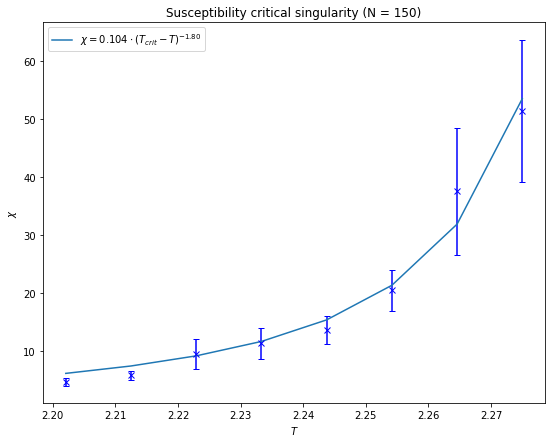

In [38]:
max = np.argmax(Chis)
T_c = Ts[max]
s = slice(15, max-2)
T_range = np.abs(Ts[s] - T_c)
Chi_range = Chis[s]
Chi_err_range = Chi_errs[s]/3

bounds_gamma = ([-3, -5], [0, 20])
fit, fit_err = curve_fit(power_sing, T_range, Chi_range, bounds=bounds_gamma)

print(fit)
print(np.sqrt(fit_err[0][0]))

[gamma, a] = fit
fig, ax = plt.subplots()
ax.errorbar(-T_range+T_c, Chi_range, Chi_err_range, capsize=3, fmt='bx')
Chi_pred = power_sing(T_range, gamma, a)
ax.plot(-T_range+T_c, Chi_pred)

ax.set_title("Susceptibility critical singularity (N = 150)")
ax.set_xlabel("$T$")
ax.set_ylabel("$\chi$")
fig.set_size_inches(9, 7)

ax.legend(["$\chi = 0.104\cdot(T_{crit} - T)^{-1.80}$"])
plt.savefig(r"Pics/gamma2d.png", format="png", dpi=1200, bbox_inches='tight')

# Specific heat

[-0.28719706  0.61365568]
0.022986525297458236


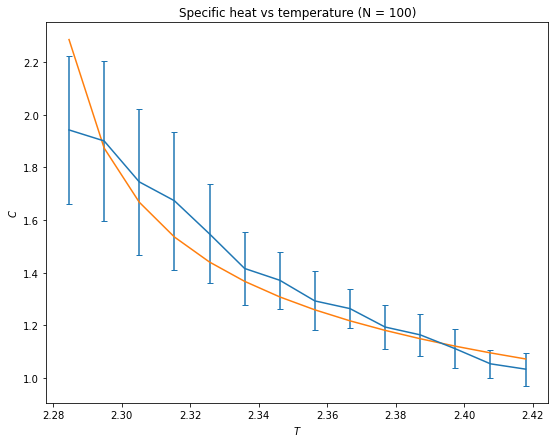

In [27]:
max = np.argmax(Cs)
T_c = Ts[max]
s = slice(max+1, -12)
T_range = np.abs(Ts[s] - T_c)
C_range = Cs[s]
C_err_range = C_errs[s]/1.4

bounds_gamma = ([-0.5, -5], [0.5, 20])
fit, fit_err = curve_fit(power_sing, T_range, C_range, bounds=bounds_gamma, sigma=C_err_range)

print(fit)
print(np.sqrt(fit_err[0][0]))

[gamma, a] = fit
fig, ax = plt.subplots()
ax.errorbar(T_range+T_c, C_range, C_err_range, capsize=3)
C_pred = power_sing(T_range, gamma, a)
ax.plot(T_range+T_c, C_pred)

ax.set_title("Specific heat vs temperature (N = 100)")
ax.set_xlabel("$T$")
ax.set_ylabel("$C$")
fig.set_size_inches(9, 7)

[-0.21533694 -0.26083407]
0.021667697354936705


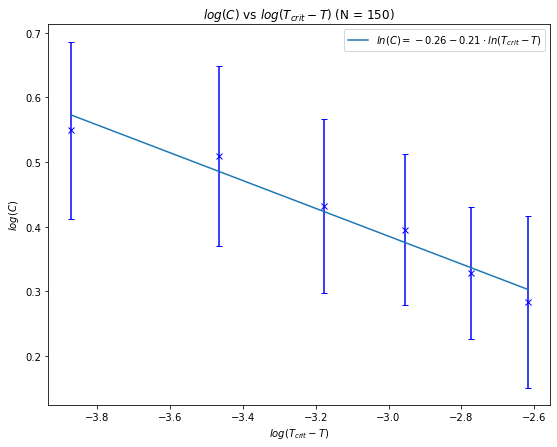

In [39]:
max = np.argmax(Cs)
T_c = Ts[max]
s = slice(14, max-1)
T_range = np.abs(Ts[s] - T_c)
T_log = np.log(T_range)
C_log = np.log(Cs[s])
C_log_err = C_errs[s]/Cs[s]

bounds_gamma = ([-0.5, -5], [0.5, 20])
fit, fit_err = curve_fit(lin_fit, T_log, C_log, bounds=bounds_gamma)

print(fit)
print(np.sqrt(fit_err[0][0]))

[gamma, a] = fit
fig, ax = plt.subplots()
ax.errorbar(T_log, C_log, C_log_err, capsize=3, fmt='bx')
C_pred = lin_fit(T_log, gamma, a)
ax.plot(T_log, C_pred)

ax.set_title("$log(C)$ vs $log(T_{crit} - T)$ (N = 150)")
ax.set_xlabel("$log(T_{crit} - T)$")
ax.set_ylabel("$log(C)$")
fig.set_size_inches(9, 7)

ax.legend(["$ln(C) = -0.26 - 0.21\cdot ln(T_{crit} - T)$"])
plt.savefig(r"Pics/alpha2d.png", format="png", dpi=1200, bbox_inches='tight')